### **Lab 11: Curvilinear Integration**

Lab Goals
*   Bring together multiple concepts from the class
*   Provide the building blocks for an aerospace-related example

Observe the following plot of a quarter of the unit circle.

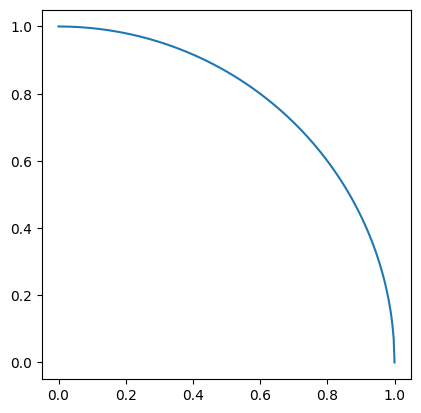

In [1]:
# Provided code
import numpy as np
import matplotlib.pyplot as plt
xpts = np.append(np.linspace(0, 0.8, 81), np.linspace(0.8, 1.0, 81))
ypts = np.sqrt(1-xpts**2)
plt.plot(xpts,ypts)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

#### **1. Integrating to Find the Length of a Curve**

We can use Gauss-Legendre to integrate along the length of a curve. The expression for the arc length can be written as:

$$I = \int_{S_1}^{S_2} \mathrm{d}s = \int_{-1}^{1}J \mathrm{d}\rho \approx\ \sum_{i=1}^nw_i J$$

The Jacobian is given by:

$$J = \frac{\mathrm{d}s}{\mathrm{d}\rho} = \left[\left(\frac{\mathrm{d}x}{\mathrm{d}\rho} \right)^2 + \left(\frac{\mathrm{d}y}{\mathrm{d}\rho} \right)^2\right]^{\frac{1}{2}}$$

Conceptual question: **Why is this the Jacobian?**

We now need to get ourselves in the space of $\rho$ so we can use Gauss-Legendre. However, we only know $x$ and $y$; they are related to $s$ in some way, as the Jacobian above indicates. So, we need to write both $x$ *and* $y$ in terms of $\rho$ (a parameterization), bypassing this unknown $s$ altogether (in reality, we know this is a circle and that $s$ is the angle $\theta$ from $0$ to $\pi/2$ in polar coordinates in this case, but let's pretend we don't know that and instead only have $x$ and $y$ points). This is the same idea as the linear mapping we used in the previous lab when we had two points: the endpoints $x_i=[a,b]$. Here is the linear mapping equation and its basis functions $N$:

$$x = \frac{1}{2}(1 - \rho)a + \frac{1}{2}(1+\rho)b, \qquad N_\text{linear} = \left[ \frac{1}{2}(1 - \rho), \quad \frac{1}{2}(1+\rho) \right]$$

This time, let's use a quadratic coordinate mapping given by:

$$ N_\text{quadratic} = \left[ \frac{1}{2}\rho(\rho-1), \quad -\rho^2 + 1, \, \quad \frac{1}{2}\rho(\rho+1) \right]$$


Conceptual question: **Where do these functions in $N$ come from? Does this form look familiar?**

Looking closely, we see we can rewrite the linear mapping from last time as the following summation:

$$x(\rho)=aN_0+bN_1=\sum_{i=0}^1x_iN_i$$

Thus for our new quadratic mapping, we simply use one more point (and this time, we need to map *both* $x$ and $y$):

$$x(\rho)=\sum_{i=0}^2x_iN_i, \qquad y(\rho)=\sum_{i=0}^2y_iN_i$$

Let's plot this approximation for our quarter circle to see what it looks like. We need 3 points to perform a quadratic mapping, so let's use:

$$x = \left[0,\ \cos\left(\frac{\pi}{4}\right),\ 1\right]$$

$$y = \left[1,\ \sin\left(\frac{\pi}{4}\right),\ 0\right]$$

Conceptual question: **Why did we choose these? What if we chose different ones?**

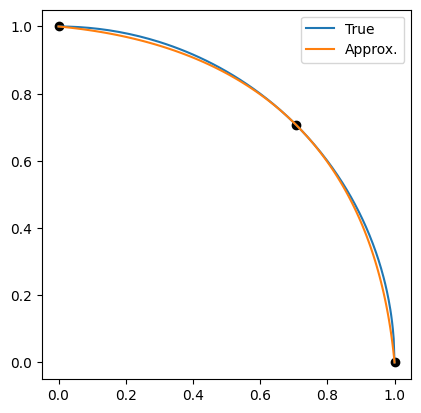

In [2]:
# Starter code

plotrhos = np.linspace(-1,1,101)  # rhos just for plotting, not Gauss-Legendre
N = [0.5*plotrhos*(plotrhos-1), -plotrhos**2 + 1, 0.5*plotrhos*(plotrhos+1)]

xi = [0,np.cos(np.pi/4),1]  # Known x points
yi = [1,np.sin(np.pi/4),0]  # Known y points

# Get x and y in terms of rho
# Plot the 3 points we are using to map
# Plot the approximation of the quarter circle
x_fit = np.dot(xi,N)
y_fit = np.dot(yi,N)


plt.scatter(xi,yi,color='k')
plt.plot(xpts,ypts,label='True')  # True quarter circle
plt.plot(x_fit,y_fit,label='Approx.')

ax = plt.gca()
ax.set_aspect('equal')
plt.legend()
plt.show()

This is a pretty good fit! Now, we can use this fit to estimate the length of the original quarter circle.

Notice that we have $J$ in the integrand. That means we need $\frac{\mathrm{d}x}{\mathrm{d}\rho}$ and $\frac{\mathrm{d}y}{\mathrm{d}\rho}$, not just $x$ and $y$. **How can we define these derivatives?**

$$ \frac{\mathrm{d}x}{\mathrm{d}\rho}=\frac{\mathrm{d}}{\mathrm{d}\rho}\sum_{i=0}^2x_iN_i, \qquad \frac{\mathrm{d}y}{\mathrm{d}\rho}=\frac{\mathrm{d}}{\mathrm{d}\rho}\sum_{i=0}^2y_iN_i $$

Remember that $x_i$ and $y_i$ are just constants, while $N$ is a function of $\rho$. Once you have expressions for $\frac{\mathrm{d}x}{\mathrm{d}\rho}$ and $\frac{\mathrm{d}y}{\mathrm{d}\rho}$, use them to define $J$ and attempt the Gauss-Legendre integration with 2 integration points. **What is the analytical solution? How does it compare to our integration?**

In [3]:
# Starter code

num_int_pts = 2
[rhos,w] = np.polynomial.legendre.leggauss(num_int_pts)

I = 0

for i in range(num_int_pts):

  rho = rhos[i]
  N = [0.5*rho*(rho-1),-rho**2 + 1, 0.5*rho*(rho+1)]
  dNdr = [rho - 0.5, -2*rho, rho + 0.5]

  dxdr = np.dot(xi, dNdr)
  dydr = np.dot(yi, dNdr)
  J = np.sqrt(dxdr**2 + dydr**2)
  I += w[i]*J

print('True Solution: ', np.pi/2.0)
print('Integration: ', I)

True Solution:  1.5707963267948966
Integration:  1.5676503651463527


**Optional:** What would happen if we tried to do a linear mapping with these 3 points? Modify the codes from above to see what happens. Since there are 3 points, we will need two separate mappings and integrations.

In [4]:
# Starter code

N = [0.5*(1-plotrhos), 0.5*(1+plotrhos)]  # Linear basis functions

# Perform two linear mappings
# Plot the comparison just as we did for the quadratic mapping

In [5]:
# Starter code

# Use 2 loops, one to integrate over each segment
# Print the true and approximate solutions for the curve length

####  **2. Plotting a Function with Arrows**

You can do more than find lengths with integration. What if we have a function, such as a pressure distribution, surrounding our curve? Integrating a pressure distribution along a line should give us a force per unit length, which would be useful to know for anything from a wing to a submarine.

Let's use the function $F(x)=\cos^2(\pi x)$. We will claim this is a pressure distribution. Note that this function only varies in $x$, so it will have the same $F(x)$ value for any position in $y$. Before we integrate, let's first visualize this function both with our normal plotting and with arrows:

```plt.arrow(base_x, base_y, delta_x, delta_y, color='r', width=1/100, length_includes_head=True)```

To see exactly which pressure values and points are going to be used when we integrate, we can use the integration points $\rho$ to create a domain in $x$. This is easy to do! We learned how to get $x(\rho)$ earlier. For the sake of visualization, let's start with 10 integration points. We will need a loop to plot each arrow individually.

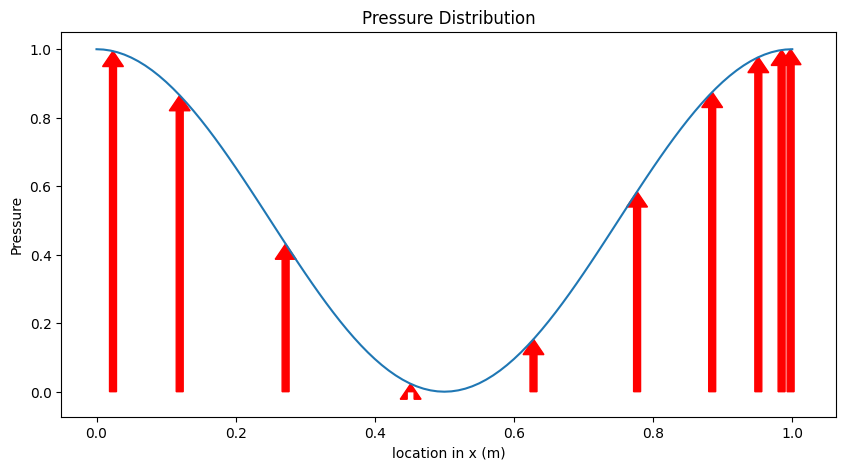

In [6]:
# Starter code

# Define the function
def F(x):
  return np.cos(np.pi*x)**2

num_int_pts = 10  # We can adjust this later and see what happens
[rhos,w] = np.polynomial.legendre.leggauss(num_int_pts)

N = [0.5*rhos*(rhos-1), -rhos**2 + 1, 0.5*rhos*(rhos+1)]
x_rho = np.dot(xi, N)
y_rho = np.dot(yi, N)

# Collect the necessary information for plotting arrows
pressure_values = F(x_rho) # Pressure vals
normal_vectors = [(0,1)] * len(rhos) # Normal vectors point stright up

# Create the plot
plt.figure(figsize=(10,5))
plt.title('Pressure Distribution')
plt.xlabel('location in x (m)')
plt.ylabel('Pressure')

# Plot the normal vectors as arrows
for i in range(len(rhos)):
  x_len = normal_vectors[i][0]*pressure_values[i]
  y_len = normal_vectors[i][1]*pressure_values[i]
  plt.arrow(x_rho[i],0,x_len,y_len,color='r',width=1/100,length_includes_head=True)

# Plot the function normally to compare
plotx = np.linspace(0, 1, 101)
plt.plot(plotx, F(plotx))
plt.show()

# Define x in terms of rho
# Get the pressure values at those x values
# Define unit normal vectors for the direction the arrows will point (up)
# Plot the arrows
# Plot the function normally to compare

**Now, that is not visually intuitive.** It is not very clear how pressure is being applied to the quarter circle. Let's go one step further and use this arrow method to show the pressure distribution on the curve itself. Remember that pressure acts normal to any surface. **How can we define normal vectors? Even better, how might we define and use *tangent* vectors to get the normals?**

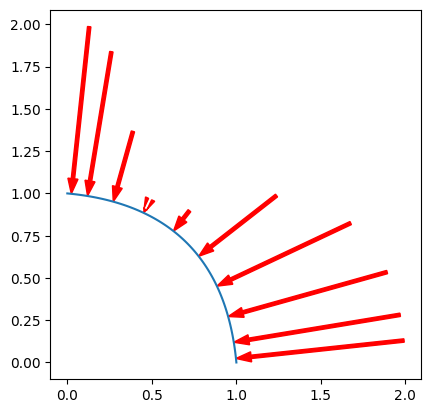

In [7]:
# Starter code

plotrhos = np.linspace(-1, 1, 101)
plotN = [0.5*plotrhos*(plotrhos-1), -plotrhos**2 + 1, 0.5*plotrhos*(plotrhos+1)]
z_vec = np.array([0,0,1])

for i in range(num_int_pts):

  rho = rhos[i]
  N = [0.5*rho*(rho-1),-rho**2 + 1, 0.5*rho*(rho+1)]
  dNdr = [rho - 0.5, -2*rho, rho + 0.5]

  x_rho = np.dot(N, xi)
  y_rho = np.dot(N, yi)

  dxdr = np.dot(dNdr, xi)
  dydr = np.dot(dNdr, yi)

  slope_vec = np.array([dxdr, dydr, 0])
  normal_vec = np.cross(slope_vec, z_vec)
  unit_normal = normal_vec/np.linalg.norm(normal_vec)
  pressure_values = F(x_rho)
  p_vec = unit_normal*pressure_values

  plt.arrow(x_rho-p_vec[0], y_rho-p_vec[1],p_vec[0],p_vec[1],color='r',width=1/50,length_includes_head=True)

x_fit = np.dot(xi,plotN)
y_fit = np.dot(yi,plotN)
plt.plot(x_fit,y_fit)

ax = plt.gca()
ax.set_aspect('equal')
plt.draw()

Finally, let's integrate our pressure distribution function along the curve. We can put it in the integrand as follows:

$$I = \int_{s_1}^{s_2} F(x) \mathrm{d}s = \int_{-1}^1 P(\rho)J\ d\rho\ \approx\ \sum_{i=1}^nw_i P(\rho_i) J$$

In [8]:
# Starter code

# Integrate! This is very similar to what we did for the curve length earlier

I = 0

for i in range(num_int_pts):

  rho = rhos[i]
  N = [0.5*rho*(rho-1),-rho**2 + 1, 0.5*rho*(rho+1)]
  dNdr = [rho - 0.5, -2*rho, rho + 0.5]

  x_rho = np.dot(N, xi)
  y_rho = np.dot(N, yi)

  dxdr = np.dot(dNdr, xi)
  dydr = np.dot(dNdr, yi)

  J = np.sqrt(dxdr**2 + dydr**2)
  I += F(x_rho)*w[i]*J

print('Integration: ', I)

Integration:  0.950353247578195


With "enough" Gauss-Legendre integration points, the best approximation we can get is 0.95035324. If we were to integrate along a true quarter circle, the true value would be 0.96124157. The remaining discrepancy between the approximation and the true value arises because we are approximating the quarter circle, not because of some systemic imprecision in Gauss-Legendre integration.